In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from googletrans import Translator
from camel_tools.sentiment import SentimentAnalyzer
from camel_tools.utils.normalize import normalize_unicode
from transformers import pipeline
import json

from camel_tools.sentiment import SentimentAnalyzer
from camel_tools.utils.normalize import normalize_unicode
from camel_tools.utils.normalize import normalize_alef_maksura_ar
from camel_tools.utils.normalize import normalize_alef_ar
from camel_tools.utils.normalize import normalize_teh_marbuta_ar
from camel_tools.utils.dediac import dediac_ar
from camel_tools.tokenizers.word import simple_word_tokenize

In [11]:
# translator = Translator()

# translation = translator.translate("",  dest='ar')
# translation.text

In [12]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [47]:
import qalsadi.lemmatizer

In [55]:
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('/Users/mindyshiben/codeup-data-science/arabic_media_nlp_project/sample_articles.csv')

In [49]:
df = df.dropna()

In [50]:
df = df[:50]

In [51]:
df.head()

,id,url,headline,dateline,text,tags,source
0,SHG_ARB_0090935,http://www.echoroukonline.com/ara/articles/147...,15? ?ألف? ?جزائري? ?حصلوا? ?على? ?الجنسية? ?ال...,2012/11/16,بلغ عدد الجزائريين الذين حصلوا على الجنسية الف...,['أمريكا'],Echoroukonline
1,YM7_ARB_0396872,http://www1.youm7.com/News.asp?NewsID=422839,بالصور.. وثائق إسرائيلية تنشر للمرة الأولى تكش...,السبت، 28 مايو 2011 - 16:40,كشفت إسرائيل عن وثائق جديدة اليوم، السبت، عن أ...,['أمريكا'],Youm7
2,TRN_ARB_0162957,http://tishreen.news.sy/tishreen/public/read/1...,إلى من يهمه الأمر .. بولمانات الحج,09/11/2008,09/11/2008\nإلى من يهمه الأمر .. بولمانات الحج...,['9/11'],Techreen
3,MSY_ARB_0096078,http://today.almasryalyoum.com/printerfriendly...,هجوم بالمولوتوف على طاقم «تحت الأرض»,20/6/2013,تعرض طاقم مسلسل «تحت الأرض» لهجوم بالمولوتوف و...,['بوش'],Almasryalyoum
4,ETD_ARB_0104345,http://www.alittihad.ae/details.php?id=11616&y...,قوات الأطلسي تستعد لهجوم واسع في قندهار,تاريخ النشر: الأحد 28 فبراير 2010,أعلنت واشنطن أمس أن الهجوم الكبير الذي تشنه ال...,"['واشنطن', 'أوباما', 'القاعدة']",Alittihad


In [52]:
def clean(text):
    lemmer = qalsadi.lemmatizer.Lemmatizer()
    lemmas = lemmer.lemmatize_text(text)
    return lemmas

In [102]:
all_words = clean(' '.join(df.text))

In [110]:
all_words

['ﺑﻠﻎ',
 'ﻋﺪﺩ',
 'ﺍﻟﺠﺰﺍﺋﺮﻳﻴﻦ',
 'ﺍﻟﺬﻳﻦ',
 'ﺣﺼﻠﻮﺍ',
 'ﻋﻠﻰ',
 'ﺍﻟﺠﻨﺴﻴﺔ',
 'ﺍﻟﻔﺮﻧﺴﻴﺔ',
 'ﻗﺮﺍﺑﺔ',
 '15',
 'ﺃﻟﻒ',
 'ﺷﺨﺺ',
 'ﺧﻼﻝ',
 'ﺍﻟﻌﺎﻡ',
 '2010،',
 'ﻭﻫﻮ',
 'ﻣﺎ',
 'ﻣﺜﻞ',
 'ﻧﺴﺒﺔ',
 '15',
 'ﺑﺎﻟﻤﺌﺔ',
 'ﻣﻦ',
 'ﺍﻟﺤﺎﺻﻠﻴﻦ',
 'ﻋﻠﻰ',
 'ﺍﻟﺠﻨﺴﻴﺔ',
 'ﺍﻟﻔﺮﻧﺴﻴﺔ',
 'ﻓﻲ',
 '2010،',
 'ﻓﻲ',
 'ﺣﻴﻦ',
 'ﺑﻠﻎ',
 'ﻋﺪﺩ',
 'ﺍﻟﻤﻐﺎﺭﺑﺔ',
 'ﺍﻟﺬﻳﻦ',
 'ﺣﺼﻠﻮﺍ',
 'ﻋﻠﻰ',
 'ﺍﻟﺠﻨﺴﻴﺔ',
 'ﺍﻟﻔﺮﻧﺴﻴﺔ',
 '19',
 'ﺑﺎﻟﻤﺌﺔ،',
 'ﻭﻫﻮ',
 'ﻣﺎ',
 'ﻳﻌﺎﺩﻝ',
 '19',
 'ﺃﻟﻒ',
 'ﻣﻐﺮﺑﻲ',
 'ﻭﺍﻟﺘﻮﺍﻧﺴﺔ?',
 '?ﺑـ?',
 '?5?.?6?',
 '?ﺑﺎﻟﻤﺌﺔ?.?',
 'ﻭﺃﺷﺎﺭﺕ',
 'ﻫﻴﺌﺔ',
 'ﺍﻹﺣﺼﺎﺀ',
 'ﺍﻷﻭﺭﻭﺑﻴﺔ',
 '""ﺃﻭﺭﻭﺳﺘﺎﺕ""',
 'ﻓﻲ',
 'ﺑﻴﺎﻧﺎﺗﻬﺎ',
 'ﺣﻮﻝ',
 'ﻣﻨﺢ',
 'ﺍﻟﺠﻨﺴﻴﺔ',
 'ﺍﻷﻭﺭﻭﺑﻴﺔ',
 'ﻟﻸﺟﺎﻧﺐ',
 'ﺧﻼﻝ',
 '2010،',
 'ﻭﺍﻟﺘﻲ',
 'ﻧﺸﺮﺕ',
 'ﻋﻠﻰ',
 'ﺍﻟﻤﻮﻗﻊ',
 'ﺍﻟﺮﺳﻤﻲ',
 'ﻟﻬﺎ',
 'ﻋﻠﻰ',
 'ﺷﺒﻜﺔ',
 'ﺍﻷﻧﺘﺮﻧﺖ،',
 'ﺇﻟﻰ',
 'ﺃﻥ',
 'ﺟﻞ',
 'ﺍﻟﺠﺰﺍﺋﺮﻳﻴﻦ',
 'ﻣﻨﺤﻮﺍ',
 'ﺍﻟﺠﻨﺴﻴﺔ',
 'ﺍﻟﻔﺮﻧﺴﻴﺔ،',
 'ﻓﻲ',
 'ﺣﻴﻦ',
 'ﻟﻢ',
 'ﻳﻈﻬﺮ',
 'ﺃﺛﺮ',
 'ﻟﻠﺠﺰﺍﺋﺮﻳﻴﻦ',
 'ﺍﻟﺬﻳﻦ',
 'ﻣﻨﺤﻮﺍ',
 'ﺍﻟﺠﻨﺴﻴﺔ',
 'ﻟﺪﻯ',
 'ﺩﻭﻝ',
 'ﺃﻭﺭﻭﺑﻴﺔ?',
 '?ﺃﺧﺮﻯ?',
 '?ﻋﺪﺍ?',
 '?ﻓﺮﻧﺴﺎ?.?',
 'ﻭﺑﻠﻎ',
 'ﻣﺠﻤﻮﻉ',
 'ﺍﻟﺠﻨﺴﻴﺎﺕ',
 'ﺍﻷﻭﺭﻭﺑﻴﺔ',
 'ﺍﻟﺘﻲ',
 'ﻣ

In [89]:
from ar_wordcloud import ArabicWordCloud
from ar_wordcloud.utils import read_mask_image
import arabic_reshaper
from bidi.algorithm import get_display

In [111]:
ASW1 = [get_display(arabic_reshaper.reshape(x)) for x in all_words]

In [112]:
ASW1

['ﻎﻠﺑ',
 'ﺩﺪﻋ',
 'ﻦﻴﻳﺮﺋﺍﺰﺠﻟﺍ',
 'ﻦﻳﺬﻟﺍ',
 'ﺍﻮﻠﺼﺣ',
 'ﻰﻠﻋ',
 'ﺔﻴﺴﻨﺠﻟﺍ',
 'ﺔﻴﺴﻧﺮﻔﻟﺍ',
 'ﺔﺑﺍﺮﻗ',
 '15',
 'ﻒﻟﺃ',
 'ﺺﺨﺷ',
 'ﻝﻼﺧ',
 'ﻡﺎﻌﻟﺍ',
 '2010،',
 'ﻮﻫﻭ',
 'ﺎﻣ',
 'ﻞﺜﻣ',
 'ﺔﺒﺴﻧ',
 '15',
 'ﺔﺌﻤﻟﺎﺑ',
 'ﻦﻣ',
 'ﻦﻴﻠﺻﺎﺤﻟﺍ',
 'ﻰﻠﻋ',
 'ﺔﻴﺴﻨﺠﻟﺍ',
 'ﺔﻴﺴﻧﺮﻔﻟﺍ',
 'ﻲﻓ',
 '2010،',
 'ﻲﻓ',
 'ﻦﻴﺣ',
 'ﻎﻠﺑ',
 'ﺩﺪﻋ',
 'ﺔﺑﺭﺎﻐﻤﻟﺍ',
 'ﻦﻳﺬﻟﺍ',
 'ﺍﻮﻠﺼﺣ',
 'ﻰﻠﻋ',
 'ﺔﻴﺴﻨﺠﻟﺍ',
 'ﺔﻴﺴﻧﺮﻔﻟﺍ',
 '19',
 '،ﺔﺌﻤﻟﺎﺑ',
 'ﻮﻫﻭ',
 'ﺎﻣ',
 'ﻝﺩﺎﻌﻳ',
 '19',
 'ﻒﻟﺃ',
 'ﻲﺑﺮﻐﻣ',
 '?ﺔﺴﻧﺍﻮﺘﻟﺍﻭ',
 '?ـﺑ?',
 '?5?.?6?',
 '?.?ﺔﺌﻤﻟﺎﺑ?',
 'ﺕﺭﺎﺷﺃﻭ',
 'ﺔﺌﻴﻫ',
 'ﺀﺎﺼﺣﻹﺍ',
 'ﺔﻴﺑﻭﺭﻭﻷﺍ',
 '""ﺕﺎﺘﺳﻭﺭﻭﺃ""',
 'ﻲﻓ',
 'ﺎﻬﺗﺎﻧﺎﻴﺑ',
 'ﻝﻮﺣ',
 'ﺢﻨﻣ',
 'ﺔﻴﺴﻨﺠﻟﺍ',
 'ﺔﻴﺑﻭﺭﻭﻷﺍ',
 'ﺐﻧﺎﺟﻸﻟ',
 'ﻝﻼﺧ',
 '2010،',
 'ﻲﺘﻟﺍﻭ',
 'ﺕﺮﺸﻧ',
 'ﻰﻠﻋ',
 'ﻊﻗﻮﻤﻟﺍ',
 'ﻲﻤﺳﺮﻟﺍ',
 'ﺎﻬﻟ',
 'ﻰﻠﻋ',
 'ﺔﻜﺒﺷ',
 '،ﺖﻧﺮﺘﻧﻷﺍ',
 'ﻰﻟﺇ',
 'ﻥﺃ',
 'ﻞﺟ',
 'ﻦﻴﻳﺮﺋﺍﺰﺠﻟﺍ',
 'ﺍﻮﺤﻨﻣ',
 'ﺔﻴﺴﻨﺠﻟﺍ',
 '،ﺔﻴﺴﻧﺮﻔﻟﺍ',
 'ﻲﻓ',
 'ﻦﻴﺣ',
 'ﻢﻟ',
 'ﺮﻬﻈﻳ',
 'ﺮﺛﺃ',
 'ﻦﻴﻳﺮﺋﺍﺰﺠﻠﻟ',
 'ﻦﻳﺬﻟﺍ',
 'ﺍﻮﺤﻨﻣ',
 'ﺔﻴﺴﻨﺠﻟﺍ',
 'ﻯﺪﻟ',
 'ﻝﻭﺩ',
 '?ﺔﻴﺑﻭﺭﻭﺃ',
 '?ﻯﺮﺧﺃ?',
 '?ﺍﺪﻋ?',
 '?.?ﺎﺴﻧﺮﻓ?',
 'ﻎﻠﺑﻭ',
 'ﻉﻮﻤﺠﻣ',
 'ﺕﺎﻴﺴﻨﺠﻟﺍ',
 'ﺔﻴﺑﻭﺭﻭﻷﺍ',
 'ﻲﺘﻟﺍ',
 'ﺖ

In [109]:
#all_words = arabic_reshaper.reshape(' '.join(df.text))

all_words = all_words.reshape(' '.join(df.text))

AttributeError: 'list' object has no attribute 'reshape'

In [106]:
all_words

['ﺑﻠﻎ',
 'ﻋﺪﺩ',
 'ﺍﻟﺠﺰﺍﺋﺮﻳﻴﻦ',
 'ﺍﻟﺬﻳﻦ',
 'ﺣﺼﻠﻮﺍ',
 'ﻋﻠﻰ',
 'ﺍﻟﺠﻨﺴﻴﺔ',
 'ﺍﻟﻔﺮﻧﺴﻴﺔ',
 'ﻗﺮﺍﺑﺔ',
 '15',
 'ﺃﻟﻒ',
 'ﺷﺨﺺ',
 'ﺧﻼﻝ',
 'ﺍﻟﻌﺎﻡ',
 '2010،',
 'ﻭﻫﻮ',
 'ﻣﺎ',
 'ﻣﺜﻞ',
 'ﻧﺴﺒﺔ',
 '15',
 'ﺑﺎﻟﻤﺌﺔ',
 'ﻣﻦ',
 'ﺍﻟﺤﺎﺻﻠﻴﻦ',
 'ﻋﻠﻰ',
 'ﺍﻟﺠﻨﺴﻴﺔ',
 'ﺍﻟﻔﺮﻧﺴﻴﺔ',
 'ﻓﻲ',
 '2010،',
 'ﻓﻲ',
 'ﺣﻴﻦ',
 'ﺑﻠﻎ',
 'ﻋﺪﺩ',
 'ﺍﻟﻤﻐﺎﺭﺑﺔ',
 'ﺍﻟﺬﻳﻦ',
 'ﺣﺼﻠﻮﺍ',
 'ﻋﻠﻰ',
 'ﺍﻟﺠﻨﺴﻴﺔ',
 'ﺍﻟﻔﺮﻧﺴﻴﺔ',
 '19',
 'ﺑﺎﻟﻤﺌﺔ،',
 'ﻭﻫﻮ',
 'ﻣﺎ',
 'ﻳﻌﺎﺩﻝ',
 '19',
 'ﺃﻟﻒ',
 'ﻣﻐﺮﺑﻲ',
 'ﻭﺍﻟﺘﻮﺍﻧﺴﺔ?',
 '?ﺑـ?',
 '?5?.?6?',
 '?ﺑﺎﻟﻤﺌﺔ?.?',
 'ﻭﺃﺷﺎﺭﺕ',
 'ﻫﻴﺌﺔ',
 'ﺍﻹﺣﺼﺎﺀ',
 'ﺍﻷﻭﺭﻭﺑﻴﺔ',
 '""ﺃﻭﺭﻭﺳﺘﺎﺕ""',
 'ﻓﻲ',
 'ﺑﻴﺎﻧﺎﺗﻬﺎ',
 'ﺣﻮﻝ',
 'ﻣﻨﺢ',
 'ﺍﻟﺠﻨﺴﻴﺔ',
 'ﺍﻷﻭﺭﻭﺑﻴﺔ',
 'ﻟﻸﺟﺎﻧﺐ',
 'ﺧﻼﻝ',
 '2010،',
 'ﻭﺍﻟﺘﻲ',
 'ﻧﺸﺮﺕ',
 'ﻋﻠﻰ',
 'ﺍﻟﻤﻮﻗﻊ',
 'ﺍﻟﺮﺳﻤﻲ',
 'ﻟﻬﺎ',
 'ﻋﻠﻰ',
 'ﺷﺒﻜﺔ',
 'ﺍﻷﻧﺘﺮﻧﺖ،',
 'ﺇﻟﻰ',
 'ﺃﻥ',
 'ﺟﻞ',
 'ﺍﻟﺠﺰﺍﺋﺮﻳﻴﻦ',
 'ﻣﻨﺤﻮﺍ',
 'ﺍﻟﺠﻨﺴﻴﺔ',
 'ﺍﻟﻔﺮﻧﺴﻴﺔ،',
 'ﻓﻲ',
 'ﺣﻴﻦ',
 'ﻟﻢ',
 'ﻳﻈﻬﺮ',
 'ﺃﺛﺮ',
 'ﻟﻠﺠﺰﺍﺋﺮﻳﻴﻦ',
 'ﺍﻟﺬﻳﻦ',
 'ﻣﻨﺤﻮﺍ',
 'ﺍﻟﺠﻨﺴﻴﺔ',
 'ﻟﺪﻯ',
 'ﺩﻭﻝ',
 'ﺃﻭﺭﻭﺑﻴﺔ?',
 '?ﺃﺧﺮﻯ?',
 '?ﻋﺪﺍ?',
 '?ﻓﺮﻧﺴﺎ?.?',
 'ﻭﺑﻠﻎ',
 'ﻣﺠﻤﻮﻉ',
 'ﺍﻟﺠﻨﺴﻴﺎﺕ',
 'ﺍﻷﻭﺭﻭﺑﻴﺔ',
 'ﺍﻟﺘﻲ',
 'ﻣ

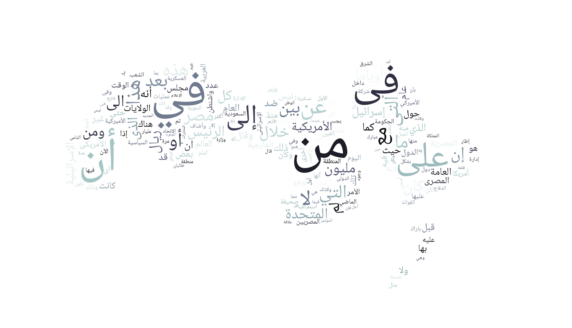

In [124]:
plt.figure(figsize=[10,12])
mask = np.array(Image.open("./map_trial.png"))
image = ArabicWordCloud(width = 3000, height = 2000, background_color='white', colormap='bone', contour_width=0,collocations=False, mask=mask).generate(' '.join(ASW1))
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.imshow(image, interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("image_map.png", format="png", bbox_inches='tight') 
plt.show()

In [56]:
plt.figure(figsize=[10,12])
mask = np.array(Image.open("./mental_health.png"))
image = WordCloud(width = 3000, height = 2000, background_color='white', contour_color='#023075', contour_width=8,colormap='rainbow', collocations=False, mask=mask).generate(' '.join(all_words))
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.imshow(image, interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("image.png", format="png", bbox_inches='tight') 
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './mental_health.png'

<Figure size 720x864 with 0 Axes>

In [ ]:
df = pd.read_csv('/Users/mindyshiben/codeup-data-science/arabic_media_nlp_project/block_3.csv')

In [ ]:
df = df.dropna()

In [ ]:
df.info()

In [ ]:
df = pd.read_csv('/Users/mindyshiben/codeup-data-science/arabic_media_nlp_project/sample_articles.csv')

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
df.url.head()

In [ ]:
df.head()

In [ ]:
#Normalize arabic characters
df['characters'] = df['text'].apply(normalize_unicode)

In [ ]:
# Orthographic Normalization (alef and teh_marbuta)
df['normalize_alef'] = (df['characters'].apply(normalize_alef_ar))

In [ ]:
#remove diacritics
df['remove_diacritics'] = (df['normalize_alef'].apply(dediac_ar))

In [ ]:
# split word tokenizer
#use sentence.split() as option to include punctuation with closest word, ie. ? at end of sentense w/word

df['words_split'] = (df['remove_diacritics'].apply(simple_word_tokenize))

In [ ]:
df.head()

In [ ]:
from camel_tools.tokenizers.word import simple_word_tokenize
from camel_tools.ner import NERecognizer


In [ ]:
from camel_tools.ner import NERecognizer

ner = NERecognizer.pretrained()

In [ ]:
from nltk.stem.isri import ISRIStemmer

In [ ]:
def preprocess_ar(text):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    st = ISRIStemmer()
    
    for t in text:
        t = ''.join(c for c in t if ud.category(c) == 'Lo' or ud.category(c) == 'Nd' or c == ' ')

    commentwords = ''
    for word in t.split():
            # Checking if the word is a stopword.
        if word not in stopwords :
            if len(word)>1:
                    # Lemmatizing the word.
                word = st.suf32(word)
                commentwords += (word+' ')
    processedText.append(commentwords)
    
    return processedText

In [ ]:
df['processed'] = (df['text'].apply(preprocess_ar))

In [47]:
import qalsadi.lemmatizer

In [48]:
def clean(text):
    lemmer = qalsadi.lemmatizer.Lemmatizer()
    lemmas = lemmer.lemmatize_text(text)
    return lemmas

In [ ]:
clean_tokens = (df['text'].apply(clean))

In [ ]:
clean_tokens

In [ ]:
from nltk import word_tokenize
from nltk.stem.isri import ISRIStemmer


word_list = "عرض يستخدم الى التفاعل مع المستخدمين في هاذا المجال !وعلمآ تكون الخدمه للستطلاع على الخدمات والعروض المقدمة"

# Define a function
def filter(text):
    st = ISRIStemmer()
    wordsfilter = []
    for a in word_tokenize(text):
        stem = st.stem(a)
        wordsfilter.append(stem)
    print(wordsfilter)

# Call the function
filter(word_list)

In [ ]:
df['isri_tokens'] = (df['text'].apply(filter))

In [ ]:
df.head()

In [ ]:
import re
import nltk
from nltk.stem.api import StemmerI

In [ ]:
def basic_clean(string):
    string = string.lower()
    string = (normalize_unicode(string))

    return string


In [ ]:
def lemmatize(string):
    st = nltk.stem.isri.ISRIStemmer()
    stems = [st.stem(word) for word in string.split()]
    return ' '.join(stems)

In [ ]:
def prepare_arabic(df, column):

    df = df.dropna()
    clean_tokens = (df[column].apply(basic_clean)
)
    
    for token in clean_tokens:
        token = ' '.join(token).split()
    
    df['lemmatized'] = clean_tokens.apply(lemmatize)
    df['total_words'] = df['lemmatized'].str.split().str.len()
    return df

In [ ]:
df = prepare_arabic(df, 'text')

In [ ]:
#df = pd.read_csv('/Users/mindyshiben/codeup-data-science/arabic_media_nlp_project/sample_articles.csv')

In [ ]:
df['words'] = df.lemmatized.apply(str.split())

In [ ]:
all_words = basic_clean(' '.join(df.lemmatized))

In [ ]:
all_freq = pd.Series(all_words).value_counts()

In [ ]:
df['words'] = 

In [ ]:
from transformers import pipeline   
from camel_tools.sentiment import SentimentAnalyzer 

In [ ]:
""" 
Change name to which file you're doing sentiment analysis on, NOT including the '.csv' 
Output file will be 'labeled_<filename>.csv'
"""

msa = pipeline('text-classification', model="CAMeL-Lab/bert-base-arabic-camelbert-msa-sentiment")
name = 'block_3'


def load_and_label_df(name):
    df = load_csv(name+'.csv')
    print(f'loaded {name}.csv')
    print('labeling/scoring...')
    df = create_labels_scores(df, name)
    print('done labeling/scoring!')
    return df

def load_csv(filename):
    df = pd.read_csv(filename)
    return df

def make_msa(df_text):
    try:
        done = msa(df_text)
        return done
    except:
        
        try:
            first_half = msa(df_text[:round(len(df_text)/2)]) 
            second_half = msa(df_text[round(len(df_text)/2):])
            if first_half[0]['label'] == second_half[0]['label']:
                label = first_half[0]['label']
                score = (test_1[0]['score'] + test_2[0]['score'])/2
            done = [{'label': label, 'score': score}]
            return done
        except:
        
            try:
                beginning = msa(df_text[:round(len(df_text)/3)]) 
                middle = msa(df_text[round(len(df_text)/3):round(len(df_text)*2/3)])
                end = msa(df_text[round(len(df_text)*2/3):])

                if (beginning[0]['label'] == middle[0]['label']) and (beginning[0]['label'] == end[0]['label']):
                    label = first_half[0]['label']
                    score = (beginning[0]['score'] + middle[0]['score'] + end[0]['score'])/3
                    done = [{'label': label, 'score': score}]
                    return done
                return False
            except:
                return False
        
def analyze_text(df):
    scores = []
    scores = df.text.apply(make_msa)
    return scores

def analyze_headline(df):
    headline_scores = []
    scores = df.headline.apply(make_msa)
    return scores

def label_and_scores(msa_scores):
    for val in msa_scores.values:
        try:
            label.append(val[0]['label'])
            scores.append(val[0]['score'])
        except:
            label.append(False)
            scores.append(False)

        return label, scores

def create_labels_scores(df, name):
    text_scores = analyze_text(df)
    label, scores = label_and_scores(text_scores)
    df['text_label'] = label
    df['text_score'] = scores

    headline_scores = analyze_headline(df)
    label, scores = label_and_scores(headline_scores)
    df['headline_label'] = label
    df['headline_score'] = scores

    # CHANGE 'BLOCK_NAME' TO WHATEVER YOU WANT
    df.to_csv('labeled_'+ name + '.csv', index=False)

    return df

create_labels_scores(df, name)

In [1]:
from transformers import pipeline   
from camel_tools.sentiment import SentimentAnalyzer 
import pandas as pd
import numpy as np

""" 
Change name to which file you're doing sentiment analysis on, NOT including the '.csv' 
Output file will be 'labeled_<filename>.csv'
"""

msa = pipeline('text-classification', model="CAMeL-Lab/bert-base-arabic-camelbert-msa-sentiment")
name = 'block_3_trial'


def load_and_label_df(name):
    df = load_csv(name+'.csv')
    print(f'loaded {name}.csv')
    print('labeling/scoring...')
    df = create_labels_scores(df, name)
    print('done labeling/scoring!')
    return df

def load_csv(filename):
    df = pd.read_csv(filename)
    return df

def make_msa(df_text):
    try:
        done = msa(df_text)
        return done
    except:
        
        try:
            first_half = msa(df_text[:round(len(df_text)/2)]) 
            second_half = msa(df_text[round(len(df_text)/2):])
            if first_half[0]['label'] == second_half[0]['label']:
                label = first_half[0]['label']
                score = (test_1[0]['score'] + test_2[0]['score'])/2
            done = [{'label': label, 'score': score}]
            return done
        except:
        
            try:
                beginning = msa(df_text[:round(len(df_text)/3)]) 
                middle = msa(df_text[round(len(df_text)/3):round(len(df_text)*2/3)])
                end = msa(df_text[round(len(df_text)*2/3):])

                if (beginning[0]['label'] == middle[0]['label']) and (beginning[0]['label'] == end[0]['label']):
                    label = first_half[0]['label']
                    score = (beginning[0]['score'] + middle[0]['score'] + end[0]['score'])/3
                    done = [{'label': label, 'score': score}]
                    return done
                return False
            except:
                return False
        
def analyze_text(df):
    scores = []
    scores = df.text.apply(make_msa)
    return scores

def analyze_headline(df):
    headline_scores = []
    scores = df.headline.apply(make_msa)
    return scores

def label_and_scores(msa_scores):
    for val in msa_scores.values:
        try:
            label.append(val[0]['label'])
            scores.append(val[0]['score'])
        except:
            label.append(False)
            scores.append(False)

        return label, scores

def create_labels_scores(df, name):
    text_scores = analyze_text(df)
    label, scores = label_and_scores(text_scores)
    df['text_label'] = label
    df['text_score'] = scores

    headline_scores = analyze_headline(df)
    label, scores = label_and_scores(headline_scores)
    df['headline_label'] = label
    df['headline_score'] = scores

    # CHANGE 'BLOCK_NAME' TO WHATEVER YOU WANT
    df.to_csv('labeled_trial'+ name + '.csv', index=False)

    return df

In [62]:
df = pd.read_csv('/Users/mindyshiben/codeup-data-science/arabic_media_nlp_project/block_3.csv')

In [70]:
df = df.dropna()

In [71]:
subset_1 = df[:5000]

In [72]:
subset_1.to_csv('block_3_part_1.csv', index=False)

In [73]:
subset_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 5000
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5000 non-null   object
 1   url       5000 non-null   object
 2   headline  5000 non-null   object
 3   dateline  5000 non-null   object
 4   text      5000 non-null   object
 5   tags      5000 non-null   object
 6   source    5000 non-null   object
dtypes: object(7)
memory usage: 312.5+ KB


In [15]:
msa = pipeline('text-classification', model="CAMeL-Lab/bert-base-arabic-camelbert-msa-sentiment")

In [74]:
msa = pipeline('text-classification', model="CAMeL-Lab/bert-base-arabic-camelbert-msa-sentiment")
name = 'subset_1'


def load_and_label_df(name):
    df = load_csv(name+'.csv')
    print(f'loaded {name}.csv')
    print('labeling/scoring...')
    df = create_labels_scores(df, name)
    print('done labeling/scoring!')
    return df

def load_csv(filename):
    df = pd.read_csv(filename)
    df['text_label'] = 'invalid'
    df['text_score'] = 'invalid'
    df['headline_label'] = 'invalid'
    df['headline_score'] = 'invalid'
    return df

def make_msa(df_text):
    try:
        done = msa(df_text)
        return done
    except:
        
        try:
            first_half = msa(df_text[:round(len(df_text)/2)]) 
            second_half = msa(df_text[round(len(df_text)/2):])
            if first_half[0]['label'] == second_half[0]['label']:
                label = first_half[0]['label']
                score = (first_half[0]['score'] + second_half[0]['score'])/2
            done = [{'label': label, 'score': score}]
            return done
        except:
            return [{'label': 'unlabeled', 'score': 'unscored'}]
        
def analyze_text(df):
    scores = []
    scores = df.text.apply(make_msa)
    return scores

def analyze_headline(df):
    headline_scores = []
    scores = df.headline.apply(make_msa)
    return scores

def label_and_scores(msa_scores):
    labels = []
    scores = []
    for val in msa_scores:
        try:
            labels.append(val[0]['label'])
            scores.append(val[0]['score'])
        except:
            labels.append(False)
            scores.append(False)

    return labels, scores

def create_labels_scores(df, name):
    text_scores = analyze_text(df)
    labels, scores = label_and_scores(text_scores)
    df['text_label'] = labels
    df['text_score'] = scores

    headline_scores = analyze_headline(df)
    labels, scores = label_and_scores(headline_scores)
    df['headline_label'] = labels
    df['headline_score'] = scores

    # CHANGE 'BLOCK_NAME' TO WHATEVER YOU WANT
    df.to_csv('labeled_part_1_'+ name + '.csv', index=False)

    return df

In [ ]:
sub_1 = create_labels_scores(df, name)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              51 non-null     object 
 1   url             51 non-null     object 
 2   headline        51 non-null     object 
 3   dateline        51 non-null     object 
 4   text            51 non-null     object 
 5   tags            51 non-null     object 
 6   source          51 non-null     object 
 7   text_label      51 non-null     object 
 8   text_score      51 non-null     object 
 9   headline_label  51 non-null     object 
 10  headline_score  51 non-null     float64
dtypes: float64(1), object(10)
memory usage: 4.5+ KB


In [61]:
df.text_label.value_counts()

neutral      28
unlabeled    14
negative      5
positive      4
Name: text_label, dtype: int64